# Fundamental Analysis - Volkswagen AG (VOW)
###  (2020-07-31)

<img src="https://upload.wikimedia.org/wikipedia/commons/6/6d/Volkswagen_logo_2019.svg" alt="Check list" style="position:absolute;
   top:0;
   right:0; height: 90px"/>
   


<div style="float: left;">
<ol>
    <li>Is the business simple and understandable? </li>
    <li>Does the business have a consistent operating history?</li>
    <li>Does the business have favourable long-term prospects?</li>
    <li>Is management candid with the shareholders?</li>
    <li> Does management resist the institutional imperative?</li>
    <li> Is the focus on Return On Equity?</li>
</ol>
</div>
<div>
<ol start="7" style="float: left;">
    <li>What is the rate of "owner earnings"?</li>
    <li>Is there a high profit margin?</li>
    <li>Has the company created at least one dollar of market value, for every dollar retained?</li>
    <li>What is the value of the business?</li>
    <li>Can it be purchased at a significant discount to its value? </li>
</ol>
</div>



## 1. Is the business simple and understandable (background)

- Main hypothesis: increased demand for personal vehicles due to disease risk
- VOW three parts:
    - Automotive brands include Volkswagen passenger cars, Audi, Bentley, Bugatti, Lamborghini, Porsche, SEAT, and Skoda. 
    - Commercial vehicle brands include MAN, Scania, and Volkswagen. 
    - The company's financial services group provides dealer financing to support floor plans, consumer financing for vehicle purchases, and other financial services.
- They were accused of engine fraud. Seems to no major changes there recently.
- Earnings -1 500 mEUR (first half of 2020)
- Cash reserves 35 000 mEUR
- Global sales in units fell by 27.5 % year on year. (sales -23%)
- They are developing promising electric cars (e-tron / e-golf)
- They predict a return to normal sales within 2020 


## 2. Does the business have a consistent operating history?

The business have had a dominate position since inception in 1932. 

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
import os
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('fivethirtyeight')
import sys
#reload(sys)
#sys.setdefaultencoding("utf-8")
sys.path.append("..") # includes parent directory
import myFunctions



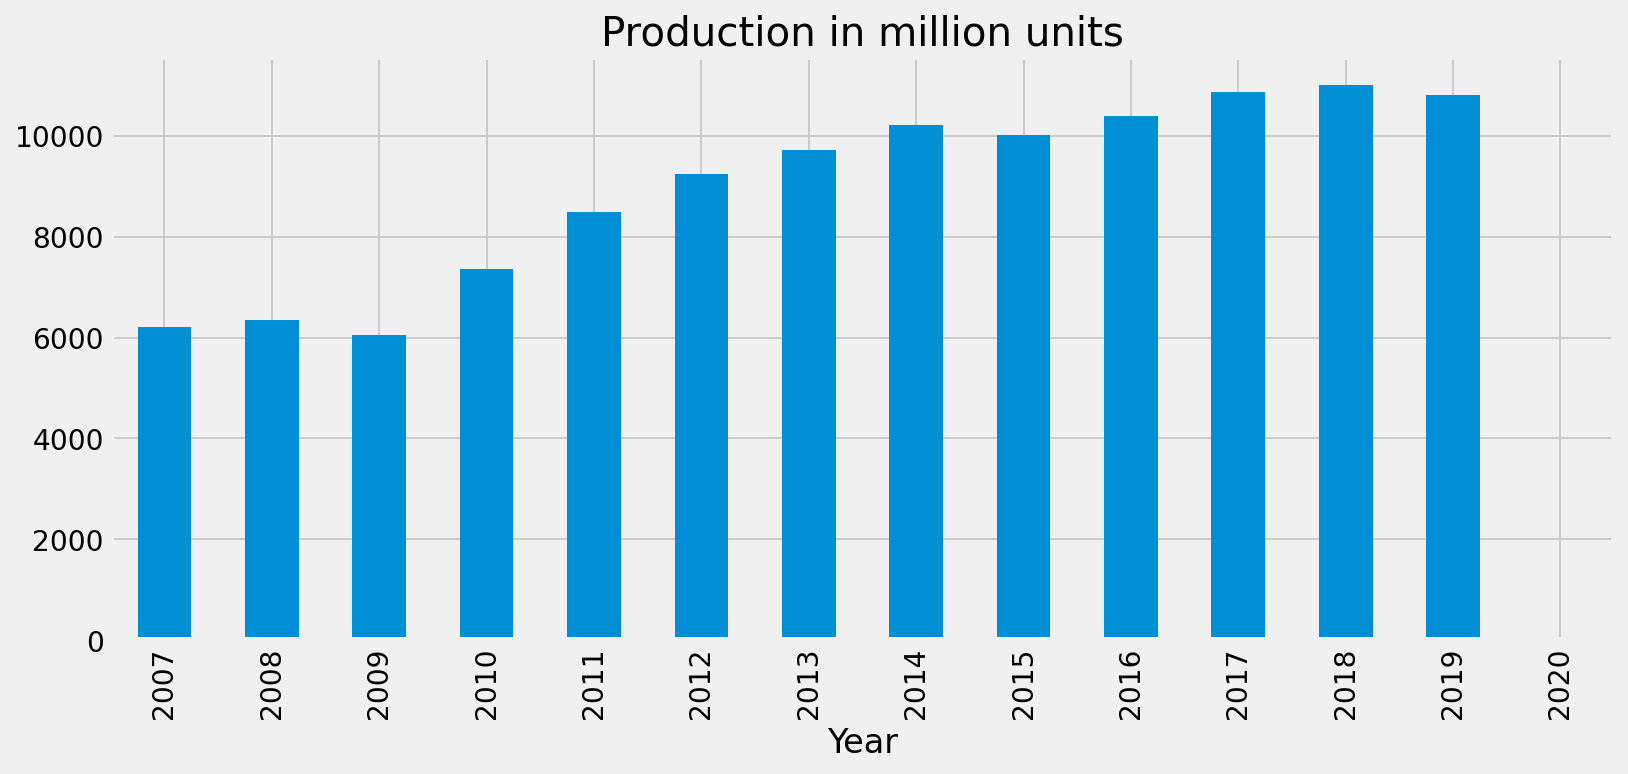

In [2]:
production = pd.read_excel('./../data/VOW/annualSalesNumbers.xlsx')
production.index = production.Year
production["Production in million units"].plot(kind='bar', 
                                               title="Production in million units", 
                                               figsize=(12,5))

## 3. Does the business have favourable long-term prospects?

The recent fear of virus can be a potential positive demand driver for private cars. Hence, given a normalization of economic activity, car purchase will likely be reinvigorated.

### Competitiors:

The biggest competitors by vehicles produced:

In [3]:
ticker_list = []

# Volkswagen AG (VOW.DE)
ticker_list.append('VOW.DE')
# Toyota Motor Corporation (TM)
ticker_list.append('TM')
# Renault SA (RNO.PA)
ticker_list.append('RNO.PA')
# General Motors Company (GM)
ticker_list.append('GM')
# Hyundai Motor Company (HYMTF)
ticker_list.append('HYMTF')

In [4]:
# Some necessary import:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from datetime import datetime  # Current date time in local system
from bs4 import BeautifulSoup

chrome_options = webdriver.ChromeOptions()
#chrome_options.add_argument("--headless")
chrome_options.add_argument("--disable-gpu")
browser = webdriver.Chrome(
    ChromeDriverManager().install(), options=chrome_options)

[WDM] - Current google-chrome version is 81.0.4044
[WDM] - Get LATEST driver version for 81.0.4044
[WDM] - Driver [C:\Users\lars\.wdm\drivers\chromedriver\win32\81.0.4044.138\chromedriver.exe] found in cache


In [5]:
firm = 'VOW3.DE'
browser.get(f"https://finance.yahoo.com/quote/{firm}/key-statistics")
try:
    browser.find_elements_by_xpath('//button[starts-with(., "Godtatt")]')[0].click()
except Exception as e:
    print(str(e))   
print(f"Page title was {browser.title}")

Page title was VOLKSWAGEN AG VZO O.N. (VOW3.DE) Valuation Measures & Financial Statistics


In [6]:
stat_list = []
for ticker in ticker_list:
    browser.get(f"https://finance.yahoo.com/quote/{ticker}/key-statistics")
    time.sleep(3.1)
    #Selenium hands of the source of the specific job page to Beautiful Soup
    soup_level2=BeautifulSoup(browser.page_source, 'lxml')
    #Beautiful Soup grabs the HTML table on the page
    table = soup_level2.find_all('table')[0]
    #Giving the HTML table to pandas to put in a dataframe object
    df_stat = pd.read_html(str(table),header=0)
    df_stat = df_stat[0]
    stat_list.append(df_stat)

In [7]:
for i in range(len(stat_list)):
    myFunctions.printmd(f"## **{ticker_list[i]}**")
    display(stat_list[i])
    print('\n \n')

## **VOW.DE**

,Unnamed: 0,As of Date: 8/8/2020Current,3/31/2020,12/31/2019,9/30/2019,6/30/2019
0,Market Cap (intraday) 5,70.74B,58.02B,87.63B,78.64B,75.12B
1,Enterprise Value 3,226.80B,212.84B,238.86B,233.71B,225.55B
2,Trailing P/E,6.74,4.56,6.50,6.46,6.59
3,Forward P/E 1,25.58,10.48,5.84,5.34,5.50
4,PEG Ratio (5 yr expected) 1,NaN,NaN,NaN,NaN,NaN
5,Price/Sales (ttm),0.29,0.24,0.35,0.33,0.32
6,Price/Book (mrq),0.59,0.50,0.74,0.68,0.65
7,Enterprise Value/Revenue 3,0.92,3.87,3.62,3.81,3.46
8,Enterprise Value/EBITDA 6,5.41,28.49,18.12,21.51,20.18


## **TM**

,Unnamed: 0,As of Date: 8/9/2020Current,3/31/2020,12/31/2019,9/30/2019,6/30/2019
0,Market Cap (intraday) 5,178.17B,166.39B,196.93B,186.43B,178.68B
1,Enterprise Value 3,318.88B,303.92B,323.67B,315.63B,311.56B
2,Trailing P/E,9.29,7.50,11.47,11.00,10.36
3,Forward P/E 1,16.84,7.59,9.25,9.33,8.32
4,PEG Ratio (5 yr expected) 1,8.13,4.66,462.34,19.44,NaN
5,Price/Sales (ttm),0.64,0.62,0.72,0.69,0.65
6,Price/Book (mrq),0.93,0.88,1.07,1.04,0.98
7,Enterprise Value/Revenue 3,0.01,0.04,0.04,0.04,0.04
8,Enterprise Value/EBITDA 6,0.08,0.65,0.24,0.28,0.25


## **RNO.PA**

,Unnamed: 0,As of Date: 8/8/2020Current
0,Market Cap (intraday) 5,6.52B
1,Enterprise Value 3,50.86B
2,Trailing P/E,NaN
3,Forward P/E 1,NaN
4,PEG Ratio (5 yr expected) 1,NaN
5,Price/Sales (ttm),0.13
6,Price/Book (mrq),0.25
7,Enterprise Value/Revenue 3,1.11
8,Enterprise Value/EBITDA 6,-23.91


## **GM**

,Unnamed: 0,As of Date: 8/8/2020Current,6/30/2020,3/31/2020,12/31/2019,9/30/2019,6/30/2019
0,Market Cap (intraday) 5,38.10B,35.42B,29.69B,51.24B,53.51B,54.65B
1,Enterprise Value 3,127.79B,115.79B,109.78B,128.93B,135.95B,138.54B
2,Trailing P/E,25.35,7.76,4.55,5.96,5.97,6.13
3,Forward P/E 1,13.09,21.28,4.34,5.65,5.50,5.74
4,PEG Ratio (5 yr expected) 1,1.34,1.99,0.38,1.07,1.07,1.29
5,Price/Sales (ttm),0.33,0.27,0.22,0.36,0.37,0.38
6,Price/Book (mrq),0.97,0.88,0.71,1.15,1.25,1.32
7,Enterprise Value/Revenue 3,1.10,6.90,3.36,4.18,3.83,3.84
8,Enterprise Value/EBITDA 6,7.96,43.27,26.49,41.18,22.30,21.22


## **HYMTF**

,Unnamed: 0,As of Date: 8/8/2020Current,3/31/2020,12/31/2019,9/30/2019,6/30/2019
0,Market Cap (intraday) 5,28.54B,17.34B,26.38B,26.64B,28.89B
1,Enterprise Value 3,80.20B,63.94B,74.04B,67.15B,71.02B
2,Trailing P/E,7.20,4.63,9.39,11.48,11.22
3,Forward P/E 1,7.06,3.65,4.53,4.20,4.99
4,PEG Ratio (5 yr expected) 1,NaN,NaN,NaN,NaN,0.15
5,Price/Sales (ttm),0.18,0.13,0.19,0.20,0.19
6,Price/Book (mrq),0.21,0.15,0.29,0.28,0.27
7,Enterprise Value/Revenue 3,0.00,0.00,0.00,0.00,0.00
8,Enterprise Value/EBITDA 6,0.01,0.04,0.03,0.05,0.03


## Getting stock prices

In [20]:
start =  int(time.mktime(datetime.date(2000,1,1).timetuple()))
end =  int(time.mktime(datetime.date(2020,6,30).timetuple()))

# List of assets:
links =[]

for ticker in ticker_list:
    links.append(myFunctions.yahooLink(start, end, ticker))

# Pulling data or loading if already pulled:
df_full = pd.DataFrame()

filename = './../data/carAnalysis.pkl'
if os.path.isfile(filename):
    df_full = pd.read_pickle(filename)
else:
    for idx, link in enumerate(links):
        print(idx, link)
        df_temp = pd.read_csv(link)
        df_temp['ticker'] = ticker_list[idx]
        df_full = df_full.append(df_temp) 
    df_full.to_pickle(filename)    

In [21]:
data = df_full[['Date', 'ticker', 'Adj Close']]
data.columns = ['date', 'ticker', 'adj_close']
data = data.drop_duplicates(keep = 'first')
# Displaying data
df = data.set_index('date')
table = df.pivot(columns='ticker')
table.columns = table.columns.droplevel()
#table.columns =  ['Bonds', 'Agriculture', 'Emerging', 'Europe', 'Japan', 'US', 'China', 'Gold', 'Oil'] #table.columns = [col[1] for col in table.columns]
table = table.dropna()
#table.head()

Text(0, 0.5, 'Normalized prices')

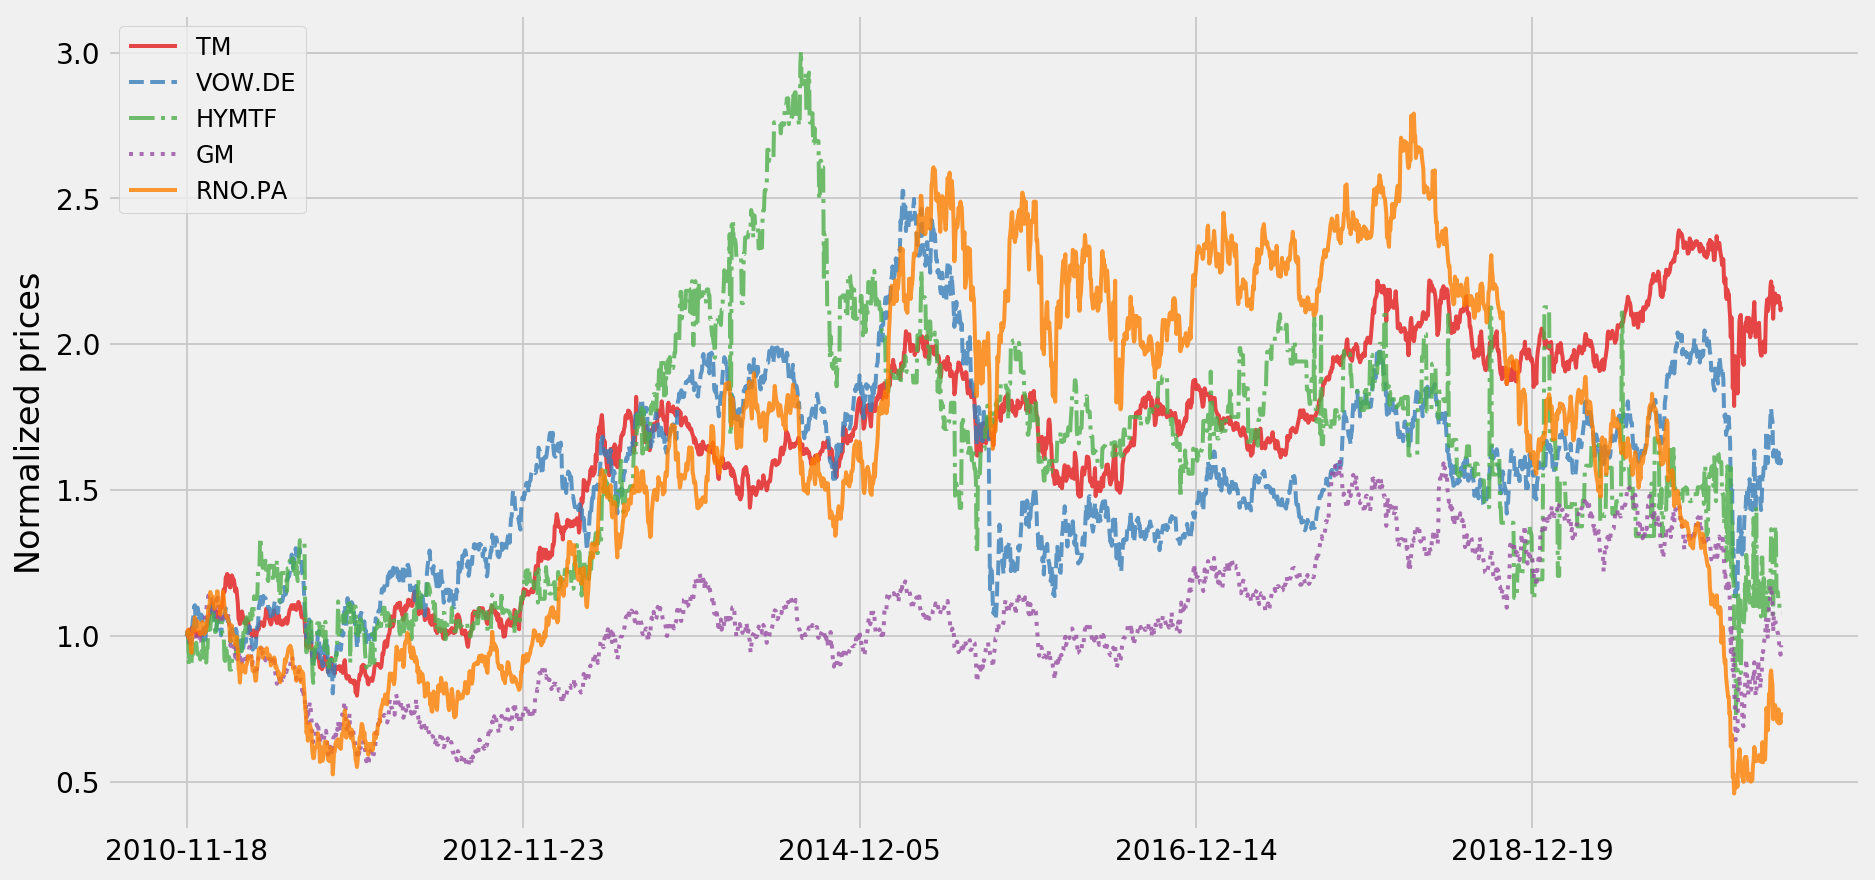

In [22]:
returns = np.log(table) - np.log(table.shift(1))
table_norm = table / table.iloc[0,:] # Normalize values to start at 1
ax = plt.gca()
palette = plt.get_cmap('Set1')

styles = ['-', '--', '-.', ':']

for idx, series in enumerate(returns.mean().sort_values(ascending = False).index):
    table_norm[series].plot(figsize=(14, 7), lw=2, alpha=0.8, color=palette(idx), style = styles[idx % 4], ax=ax)
plt.legend(loc='upper left', fontsize=12)
plt.xlabel("")
plt.ylabel('Normalized prices')

## 4. Is management candid with the shareholders?

Herbert Diess has been CEO since 2018, and has until now survived the Diesel Scandal. The board still has confidence in him, which is a bit disconcerting.

## 5. Does management resist the institutional imperative?

They were spending 7.3% on R&D in 2019, and have not recently made any major acquisition. 



## 6. Is the focus on Return On Equity?

They focus on quality growth, to maximize long term return on equity. In 2019 they gave out 6.5 EUR/share, which is around 4%. Also, 
trailing Annual Dividend Yield is 5.08%

## 7. What is the rate of "owner earnings"?

## 8. Is there a high profit margin?


Profitability (2019)

- Profit Margin	4.59%
- Operating Margin (ttm)	6.37%

Management Effectiveness (2019)
- Return on Assets (ttm)	2.05%
- Return on Equity (ttm)	9.44%

## 9. Has the company created at least one dollar of market value, for every dollar retained?



## 10. What is the value of the business?


Looking at their CF statement, they are constantly burning cash due to their heavy investment acitivity.

## 11. Can it be purchased at a significant discount to its value?


